             facebook
geoName              
Tunisia           100
Venezuela          93
Bolivia            69
Algeria            69
Slovakia           66
Hungary            64
Ecuador            63
Nicaragua          62
El Salvador        60
Paraguay           60


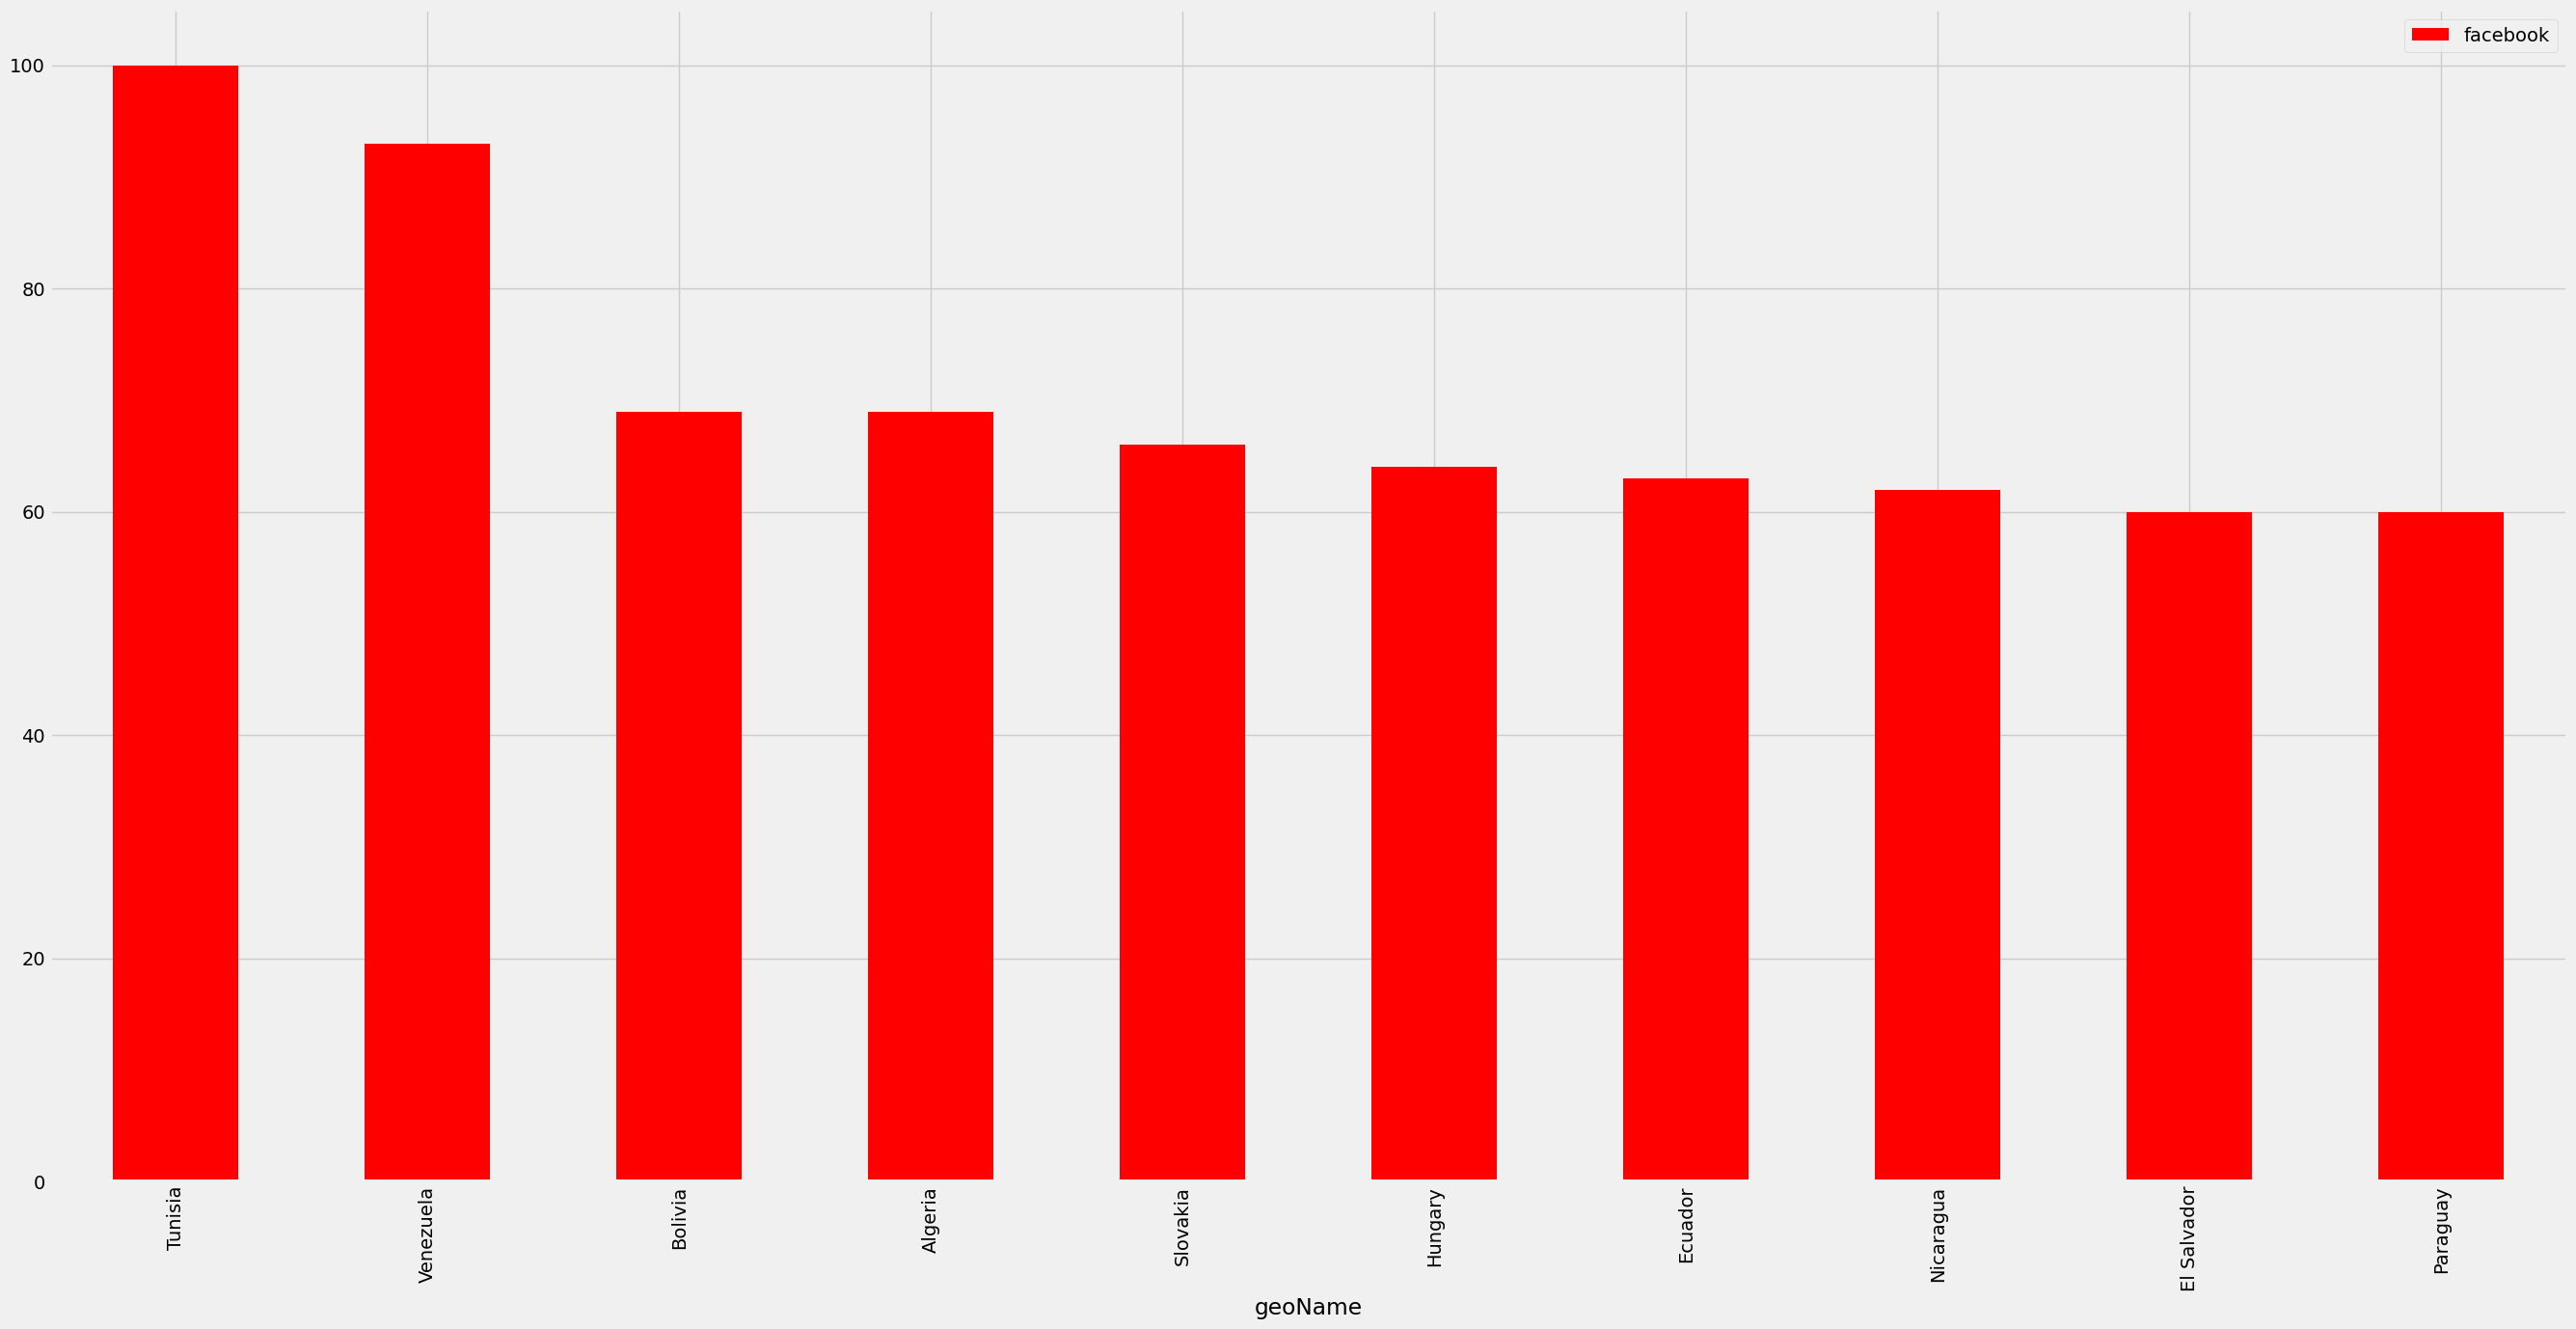

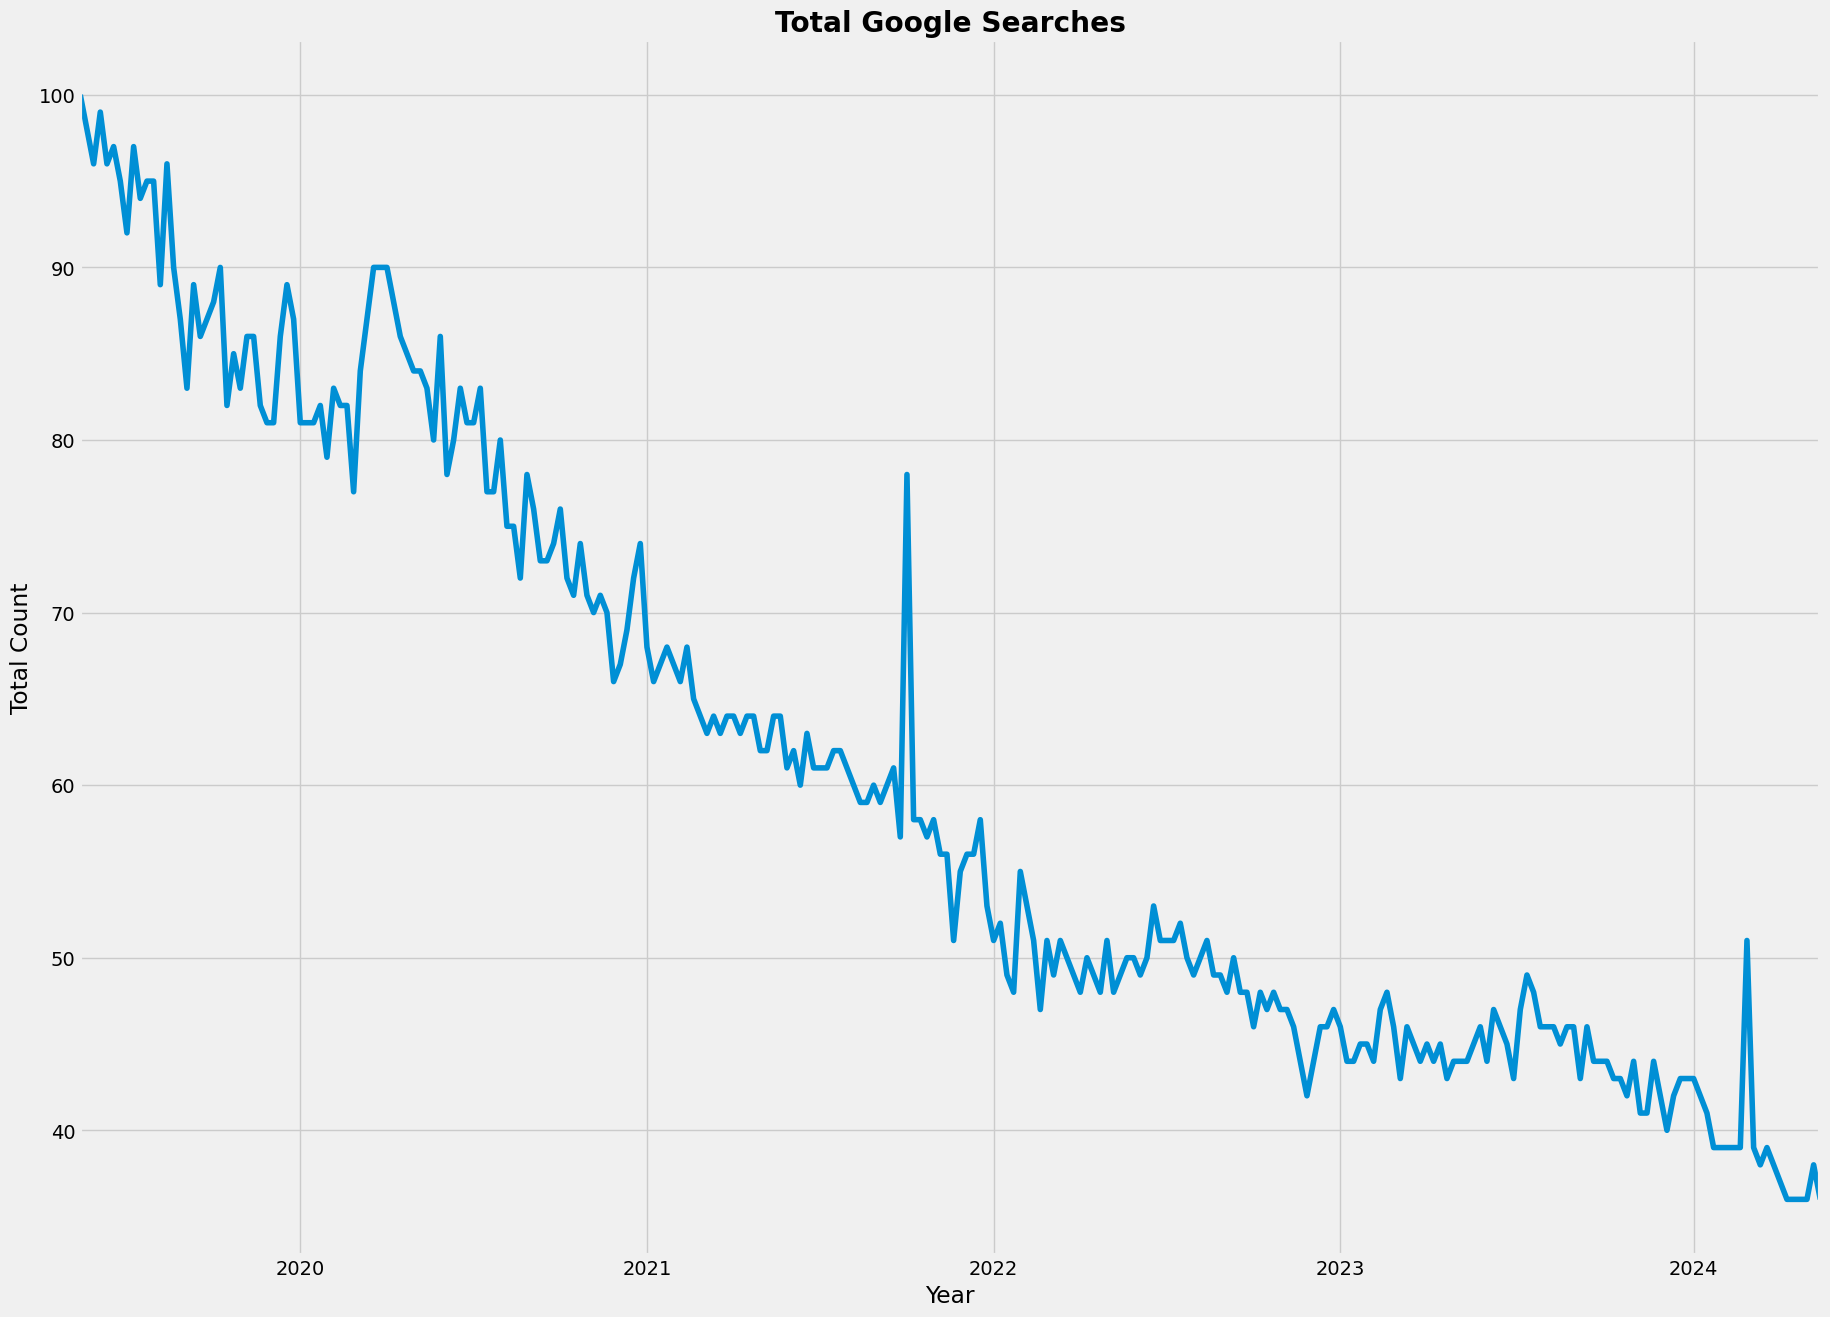

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from pytrends.request import TrendReq
import time

def retry_request(request_func, *args, max_retries=5, backoff_factor=2, **kwargs):
    """Retry the request with exponential backoff."""
    retries = 0
    while retries < max_retries:
        try:
            return request_func(*args, **kwargs)
        except Exception as e:
            print(f"Request failed. Retrying... (Attempt {retries + 1}/{max_retries})")
            retries += 1
            time.sleep(backoff_factor ** retries * 5)  # Increase wait time
    raise Exception("Max retries exceeded. Request failed.")

# Build the payload
pytrend = TrendReq()

# Retry the request with exponential backoff
pytrend = retry_request(TrendReq)

pytrend.build_payload(kw_list=['facebook'])

# Get interest by region
data = pytrend.interest_by_region()
data = data.sort_values(by="facebook", ascending=False)
data = data.head(10)
print(data)

# Plotting the data
data.reset_index().plot(x="geoName", y="facebook", figsize=(30, 15), kind="bar", color='red')
plt.style.use('fivethirtyeight')
plt.show()

# Get interest over time
data = TrendReq(hl='en-US', tz=360)

# Retry the request with exponential backoff
data = retry_request(TrendReq, hl='en-US', tz=360)

data.build_payload(kw_list=['facebook'])
data = data.interest_over_time()

# Plotting the data
fig, ax = plt.subplots(figsize=(20, 15))
data['facebook'].plot()
plt.style.use('fivethirtyeight')
plt.title('Total Google Searches', fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Total Count')
plt.show()
